**Data Preprocessing and Exploration**

In [21]:
import numpy as np
import pandas as pd

In [22]:
data = pd.read_csv('/content/car_age_price.csv')

In [23]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [24]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [26]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


**Data Visualization**

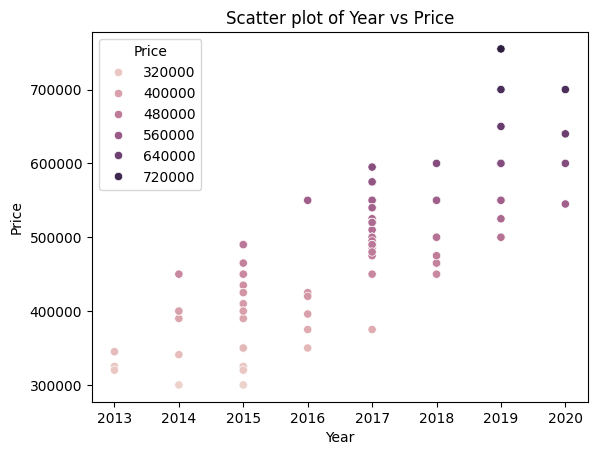

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationship between Year and Price
sns.scatterplot(x='Year', y='Price', data=data,hue='Price')
plt.title('Scatter plot of Year vs Price')
plt.show()


In [31]:
# Check for any missing values or outliers
print(data.isnull().sum())

Year     0
Price    0
dtype: int64


**Linear regression analysis**

In [41]:
from sklearn.linear_model import LinearRegression

# Extracting features (X) and target variable (y)
X = data[['Year']]
y = data['Price']

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X, y)

# Getting the coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

# Printing the equation of the best-fit line
print("Best linear relationship between Year and Price:")
print(f"Price = {slope} * Year + {intercept}")


Best linear relationship between Year and Price:
Price = 43453.37988792974 * Year + -87147246.05488417


This equation indicates that the price of the car increases by

approximately $43,453.38 for each additional year of making, and the intercept

 of approximately -$87,147,246.05 suggests  the hypothetical price when the

 the year is 0, which is not very meaningful in this context.


we can use this equation to estimate the price of a second-hand Hyundai Grand

i10 car based on its manufacturing year.

**Predicting the price of a 2022 model**

In [42]:
year_2022 = 2022
predicted_price_2022 = slope * year_2022 + intercept
print("Predicted price of a 2022 model:", predicted_price_2022)


Predicted price of a 2022 model: 715488.0785097629


**Linear Regression Model**

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [59]:
# Split the data into features (X) and target variable (y)
X = data[['Year']]
y = data['Price']

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:

# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [62]:
# Make predictions on the test set
linear_predictions = linear_reg.predict(X_test)

In [63]:
# Evaluate the model
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
print("Linear Regression RMSE:", linear_rmse)
# Calculate R-squared
r_squared = r2_score(y_test, linear_predictions)
print("R-squared Score:", r_squared)


Linear Regression RMSE: 65779.22359552195
R-squared Score: 0.36759313425902185


**Lasso Regression Model**

In [64]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [65]:
# Train the Lasso regression model
lasso_reg = Lasso(alpha=0.1)  # Regularization parameter alpha, we need to tune this
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [66]:
# Make predictions on the test set
lasso_predictions = lasso_reg.predict(X_test)

In [67]:
# Evaluate the model
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
print("Lasso Regression RMSE:", lasso_rmse)
lasso_r_squared = r2_score(y_test, lasso_predictions)
print("R-squared Score:", lasso_r_squared)

Lasso Regression RMSE: 65779.18826038415
R-squared Score: 0.36759381368868127



**Both models have very similar RMSE values and R-squared Score ,so it is difficult to tell if one outperforms other.Lasso Regression model performs slightly better than the Linear Regression model.**

**Predicting the price of a 2022 model using linear regression and lasso model**

In [71]:
from sklearn.linear_model import LinearRegression

# Assuming X_train, y_train, X_test, y_test are already defined and trained
# Train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict the price of a 2022 model using Linear Regression
year_2022 = [[2022]]
predicted_price_2022_linear = linear_reg.predict(year_2022)

print("Predicted price of a 2022 model using Linear Regression:", predicted_price_2022_linear)


Predicted price of a 2022 model using Linear Regression: [743601.61594504]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [72]:
from sklearn.linear_model import Lasso

# Train the Lasso Regression model
lasso_reg = Lasso(alpha=0.1)  # we need to tune alpha for better performance
lasso_reg.fit(X_train, y_train)

# Predict the price of a 2022 model using Lasso Regression
predicted_price_2022_lasso = lasso_reg.predict(year_2022)

print("Predicted price of a 2022 model using Lasso Regression:", predicted_price_2022_lasso)


Predicted price of a 2022 model using Lasso Regression: [743601.39177768]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(



*   Based on linear regression analysis formula: 715,488.08

*   Using Linear Regression model: 743,601.62

*   Using Lasso Regression model: 743,601.39

From these datas,it appears that the predictions from both the Linear Regression and Lasso Regression models are close to each other, with the Lasso Regression prediction being slightly lower. These predictions suggest that the price of a 2022 model second-hand Hyundai Grand i10 is estimated to be around
$715,488.08 to $743,601.62